https://cscherrer.github.io/post/max-profit/

In [1]:
import pymc3 as pm

import numpy as np

import pylab as plt

In [2]:
# Price default when demand default

p0 = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]

q0 = [34, 32, 478, 973, 541, 26, 205, 772, 249, 3]


In [3]:
with pm.Model() as m:
    
    loga = pm.Cauchy('loga',0, 10)
    
    c = pm.Cauchy('c',0, 10)
    
    logμ0 = loga + c * np.log(p0)
    
    μ0 = pm.Deterministic('μ0', np.exp(logμ0))
    
    qval = pm.Poisson('q', μ0, observed=q0)
    
    

In [4]:
loga

loga ~ Cauchy

In [5]:
c

c ~ Cauchy

In [6]:
logμ0

Elemwise{add,no_inplace}.0

In [7]:
μ0

μ0 ~ Deterministic

In [8]:
qval

q ~ Poisson

In [9]:
with m:
    trace = pm.sample()

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, loga]


/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8955129164537234, but should be

In [10]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loga,4.847,0.106,4.633,5.025,0.004,0.003,655.0,769.0,1.0
c,0.247,0.027,0.198,0.296,0.001,0.001,673.0,816.0,1.0
μ0[0],225.158,10.429,205.389,243.622,0.400,0.285,689.0,891.0,1.0
μ0[1],267.040,8.006,252.856,282.631,0.285,0.202,799.0,1082.0,1.0
μ0[2],295.109,6.507,283.265,307.485,0.197,0.140,1100.0,1638.0,1.0
μ0[3],316.819,5.800,306.913,328.694,0.138,0.098,1761.0,2787.0,1.0
μ0[4],334.766,5.788,324.036,345.702,0.101,0.071,3286.0,2732.0,1.0
μ0[5],350.191,6.284,338.736,362.560,0.112,0.079,3152.0,2636.0,1.0
μ0[6],363.793,7.076,349.781,376.778,0.142,0.100,2500.0,2422.0,1.0
μ0[7],376.006,8.016,361.483,391.857,0.180,0.127,1990.0,2248.0,1.0


In [11]:
with pm.Model() as m2:
    α = pm.Cauchy('α',0,10)
    β = pm.Cauchy('β',0,10)
    logμ0 = α + β * (np.log(p0) - np.log(p0).mean())
    μ0 = pm.Deterministic('μ0',np.exp(logμ0))
    qval = pm.Poisson('q0',μ0,observed=q0)

In [12]:
with m2:
    t = pm.sample()
pm.summary(t)

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homeb

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,5.789,0.018,5.754,5.823,0.000,0.000,3796.0,2587.0,1.0
β,0.248,0.028,0.192,0.299,0.001,0.000,3049.0,2891.0,1.0
μ0[0],224.773,11.209,203.299,244.604,0.201,0.142,3112.0,2547.0,1.0
μ0[1],266.793,8.609,251.155,282.954,0.152,0.107,3216.0,2476.0,1.0
μ0[2],294.979,6.942,282.122,307.951,0.119,0.084,3423.0,2274.0,1.0
μ0[3],316.790,6.080,306.140,328.977,0.100,0.071,3725.0,2290.0,1.0
μ0[4],334.829,5.952,323.092,345.375,0.097,0.068,3791.0,3088.0,1.0
μ0[5],350.338,6.390,338.640,362.473,0.105,0.074,3728.0,3074.0,1.0
μ0[6],364.017,7.175,351.097,377.940,0.119,0.084,3649.0,2840.0,1.0
μ0[7],376.303,8.139,361.119,391.516,0.136,0.096,3560.0,2989.0,1.0


/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_96279/756390104.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(t);
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


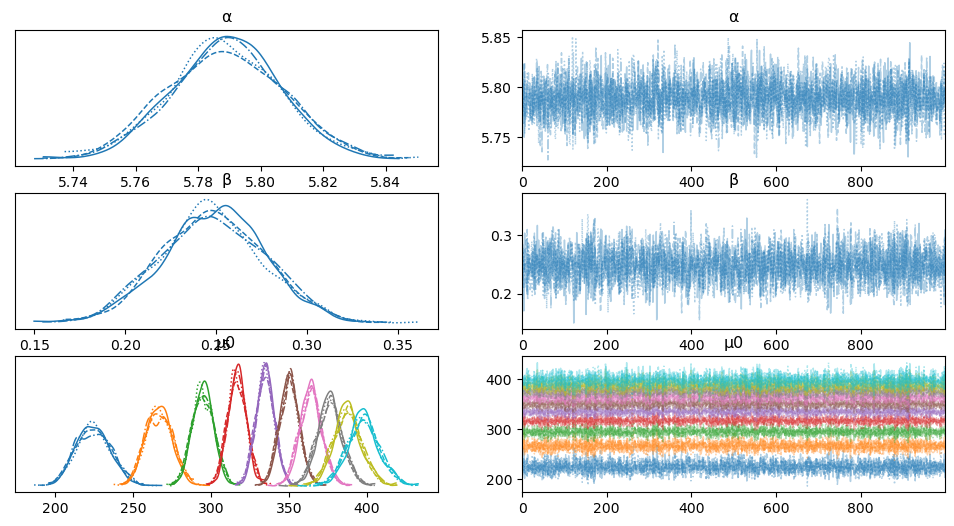

In [13]:
pm.traceplot(t);


/var/folders/95/ms6dwls51ls1jq0t456d3r200000gn/T/ipykernel_96279/638579833.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(t)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

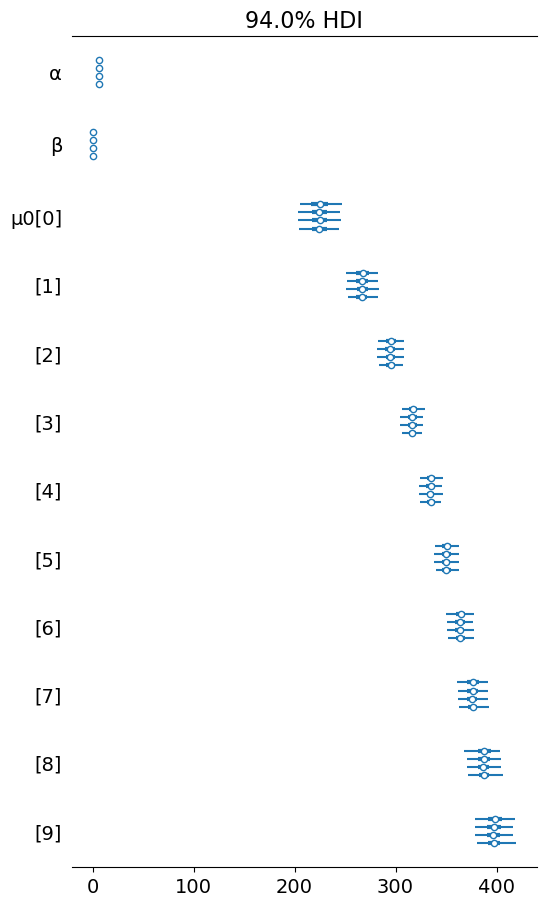

In [14]:
pm.forestplot(t)


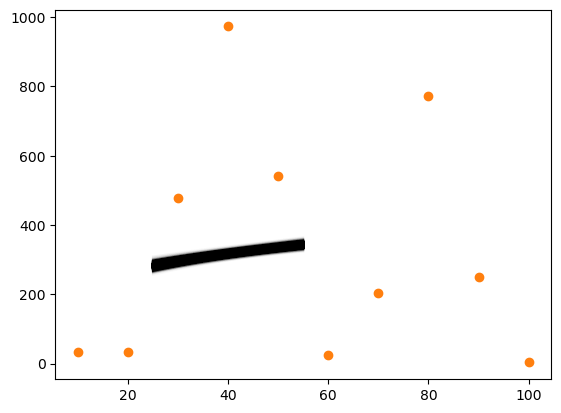

In [15]:
p = np.linspace(25,55)
μ = np.exp(t.α + t.β * (np.log(p).reshape(-1,1) - np.log(p0).mean()))
plt.plot(p,μ,c='k',alpha=0.01);
plt.plot(p0,q0,'o',c='C1');

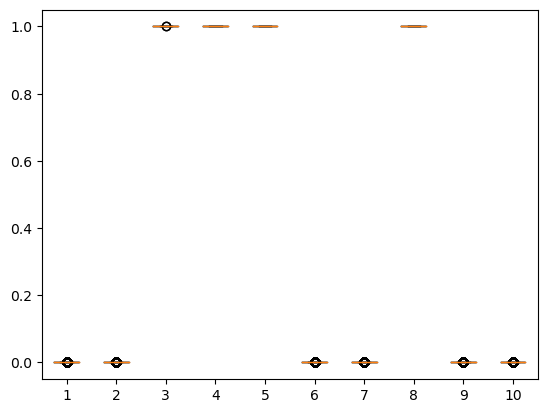

In [16]:
import scipy

plt.boxplot(scipy.stats.poisson.cdf(q0,mu=t['μ0']));


In [17]:
np.mean(q0  > np.random.poisson(t['μ0']), 0)

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 0.])

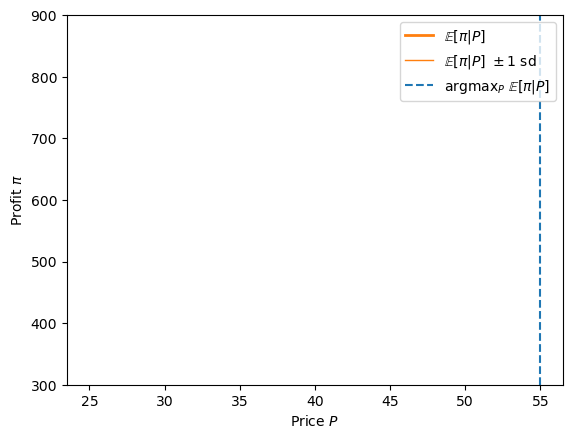

In [18]:
k = 20
π = (p - k).reshape(-1,1) * μ

plt.plot(p,π,c='k',alpha=0.01);
plt.plot(p,np.mean(π,1).T,c='C1',lw=2,label="$\mathbb{E}[\pi|P]$");
plt.fill_between(p,(np.mean(π,1)-np.std(π,1)).T,(np.mean(π,1)+np.std(π,1)).T,alpha=0.1,color='C1')
plt.plot(p,(np.mean(π,1)+np.std(π,1)).T,c='C1',lw=1,label="$\mathbb{E}[\pi|P]\ \pm$1 sd");
plt.plot(p,(np.mean(π,1)-np.std(π,1)).T,c='C1',lw=1);
pmax = p[np.argmax(np.mean(π,1))]
plt.vlines(pmax,300,900,colors='C0',linestyles='dashed',label="argmax$_P\ \mathbb{E}[\pi|P]$")

plt.ylim(300,900);
plt.xlabel("Price $P$")
plt.ylabel("Profit $\pi$")

plt.legend();